In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

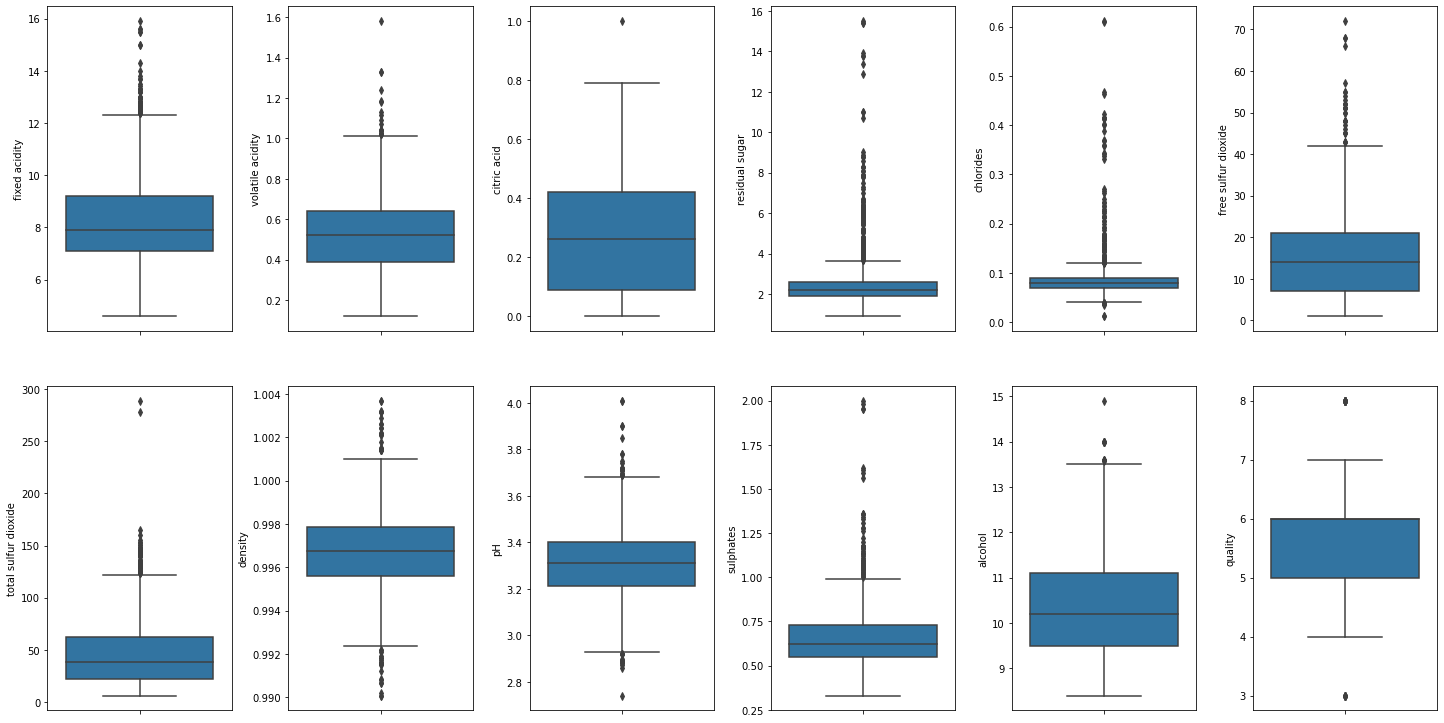

In [10]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

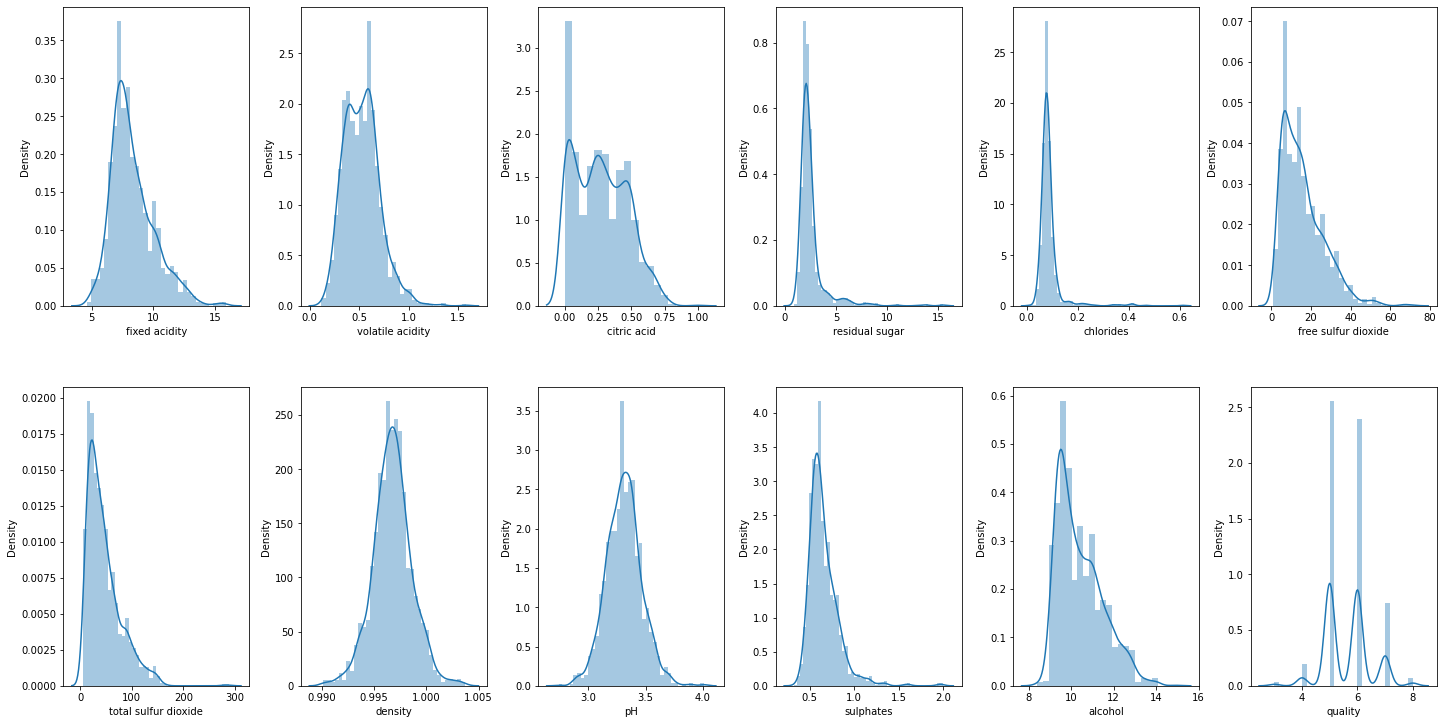

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [12]:
df['free sulfur dioxide'] = np.log(1+ df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

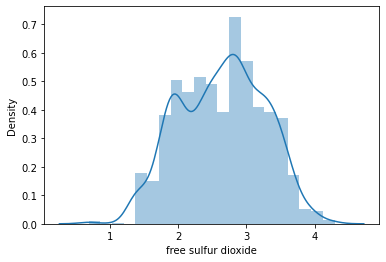

In [13]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

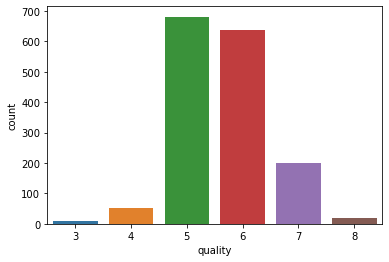

In [15]:
sns.countplot(df['quality'])

<AxesSubplot:>

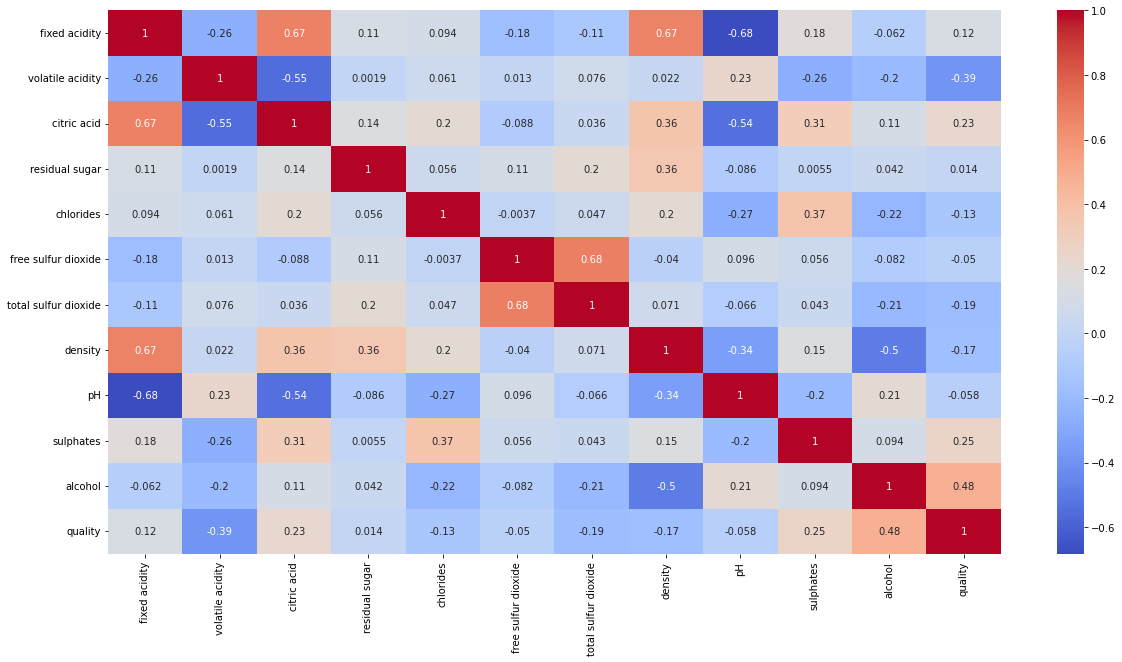

In [17]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [19]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Accuracy Score of Training Data is {lr_acc}\n")

Accuracy Score of Training Data is 0.6013344453711427
Accuracy Score of Training Data is 0.635



KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Training Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.6989157631359466
Accuracy Score of Training Data is 0.615



SVC

In [26]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [27]:
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {svc_acc}\n")

Accuracy Score of Training Data is 0.6738949124270225
Accuracy Score of Training Data is 0.655



Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {dtc_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.615



Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy Score of Training Data is {rf_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.735



In [32]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVC',  'Decision Tree', 'Random Forest'],
    'Score' : [lr_acc, knn_acc, svc_acc,  dtc_acc, rf_acc ]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest,0.735
2,SVC,0.655
0,Logistic Regression,0.635
1,KNN,0.615
3,Decision Tree,0.615
